# PROJECT : Handwritten Digits Classifier

`WORK IN PROGRESS`

In [208]:
import pandas as pd 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg

## Loading Data

internal data of sklearn digits

In [2]:
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [105]:
test_digit = mpimg.imread('/opt/datasetsRepo/digits/4.png').mean(axis=2)

In [29]:
df.target.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

## Visualize Digits

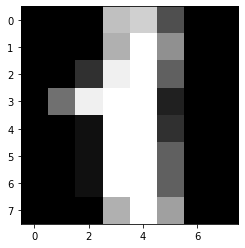

In [23]:
plt.imshow(df[df.target == 1][[i for i in df.columns if 'pixel' in i]].iloc[0].values.reshape(8,8), cmap='gray')

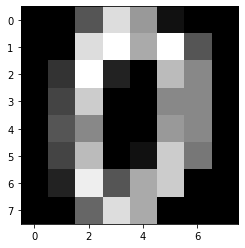

In [24]:
plt.imshow(df[df.target == 0][[i for i in df.columns if 'pixel' in i]].iloc[0].values.reshape(8,8), cmap='gray')

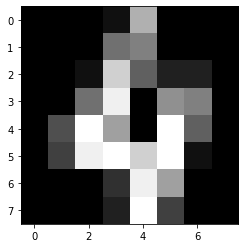

In [25]:
plt.imshow(df[df.target == 4][[i for i in df.columns if 'pixel' in i]
                              ].iloc[0].values.reshape(8, 8), cmap='gray')


## Dataset preparation

In [162]:
x_train, x_test, y_train, y_test = train_test_split(df[[i for i in df.columns if 'pixel' in i]], df.target, \
    random_state=30, test_size=0.1, stratify=df.target)

## Support Vector Machine Model Building

In [173]:
svc_model = SVC(kernel='rbf')
svc_model.fit(x_train, y_train)

SVC()

### training accuracy

In [174]:
svc_model.score(x_train, y_train)

0.9962894248608535

### testing accuracy

In [175]:
svc_model.score(x_test, y_test)

0.9944444444444445

### classification report

In [176]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [177]:
print(classification_report(y_test, svc_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       0.95      1.00      0.97        18
           8       1.00      1.00      1.00        18
           9       1.00      0.94      0.97        18

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



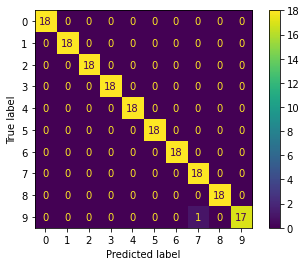

In [178]:
plot_confusion_matrix(svc_model, x_test, y_test)

### Test with real image

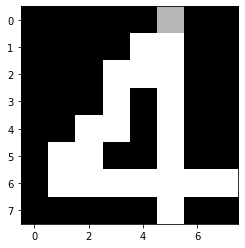

In [179]:
plt.imshow(test_digit, cmap='gray')

In [180]:
svc_model.predict(test_digit.reshape(1,64), )

array([4])